In [18]:
import sys
import pandas as pd
sys.path.append("../airflow/plugins")
from db_connection import DbConnection
from domain_model import Instrument, Interval
from portfolio import Portfolio

In [19]:
db_connection = DbConnection.local_db_connection()
instrument = Instrument.get_instrument("SBER")
interval = Interval.min_10
portfolio = Portfolio(db_connection, instrument, interval)

In [20]:
yield_df = portfolio.get_yield(initial_balance=100000)
yield_df

,yield,yield_with_commission
time_utc,,
2024-12-25 07:00:00+00:00,0.000,-0.013118
2024-12-25 07:10:00+00:00,-0.073,-0.112428
2024-12-25 07:30:00+00:00,0.013,-0.052825
2024-12-25 08:10:00+00:00,0.054,-0.038180
2024-12-25 08:20:00+00:00,0.149,0.030370
...,...,...
2025-01-29 14:10:00+00:00,1.796,-16.516897
2025-01-29 14:30:00+00:00,1.901,-16.440007
2025-01-29 14:50:00+00:00,1.926,-16.443142


In [21]:

yield_df['date_only'] = yield_df.index.date
date_only = yield_df['date_only'].unique()
num_days = len(date_only)
num_days

23

In [22]:
avg_yield = yield_df['yield'].mean()
daily_yield = avg_yield / num_days
annual_yield =  daily_yield * 248
print(f'Annual yield:{annual_yield}')

Annual yield:18.230245701210226


<Axes: xlabel='time_utc'>

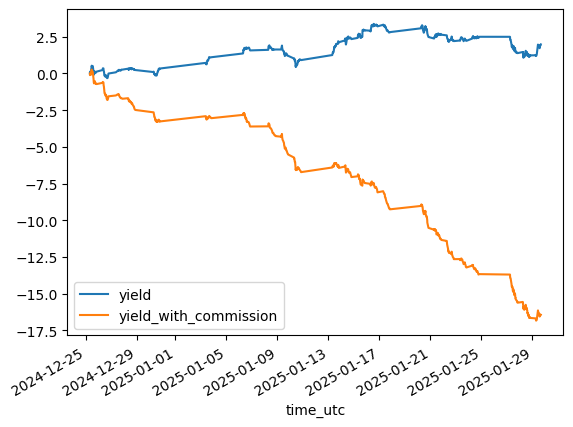

In [23]:
#yield_df['yield'].plot()
yield_df.plot()

In [24]:
operations_df = portfolio._get_operations(grouped=False)
operations_df

,price,quantity,commission
time_utc,,,
2024-12-25 07:00:00+00:00,0.00,0,-13.1185
2024-12-25 07:00:00+00:00,262.37,-100,0.0000
2024-12-25 07:10:00+00:00,0.00,0,-26.3100
2024-12-25 07:10:00+00:00,263.10,200,-0.0000
2024-12-25 07:30:00+00:00,263.96,-200,0.0000
...,...,...,...
2025-01-29 14:50:00+00:00,281.35,200,-0.0000
2025-01-29 15:20:00+00:00,281.29,-200,0.0000
2025-01-29 15:20:00+00:00,0.00,0,-28.1290
